# Assignment 1: Simple Linear Regression

1. Read in the "Computers.csv" file & perform any desired EDA.
2. Fit a regression model with target = "price".  Fit your model on the feature with the strongest correlation to price
3. Interpret the model equation
4. Visualize the residuals of your model
5. Make predictions for common values of your feature

In [3]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing matplotlib.pyplot for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Reading the CSV file 'Computers.csv' from the relative path "../Data/"
# and storing it in a DataFrame called 'computers'
computers = pd.read_csv("../Data/Computers.csv")

# Displaying the first 5 rows of the DataFrame to get an overview of the dataset
print(computers.head())  # Good practice to explicitly use print() in scripts


   price  speed   hd  ram  screen  cd multi premium  ads  trend
0   1499     25   80    4      14  no    no     yes   94      1
1   1795     33   85    2      14  no    no     yes   94      1
2   1595     25  170    4      15  no    no     yes   94      1
3   1849     25  170    8      14  no    no      no   94      1
4   3295     33  340   16      14  no    no     yes   94      1


### EDA

Text(0, 0.5, 'Frequency')

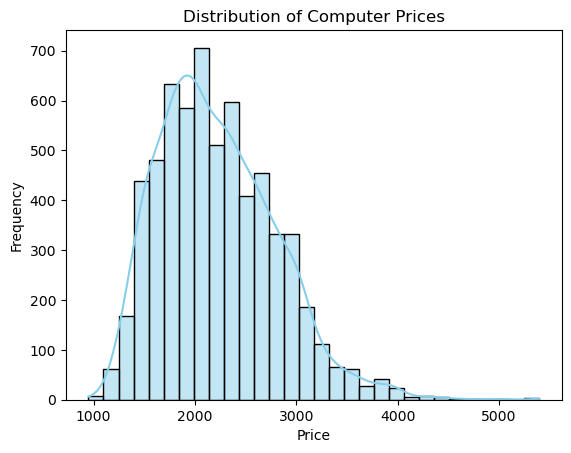

In [6]:
# Plotting a histogram to visualize the distribution of computer prices
# Adds color and styling for better presentation
sns.histplot(computers["price"].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Computer Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

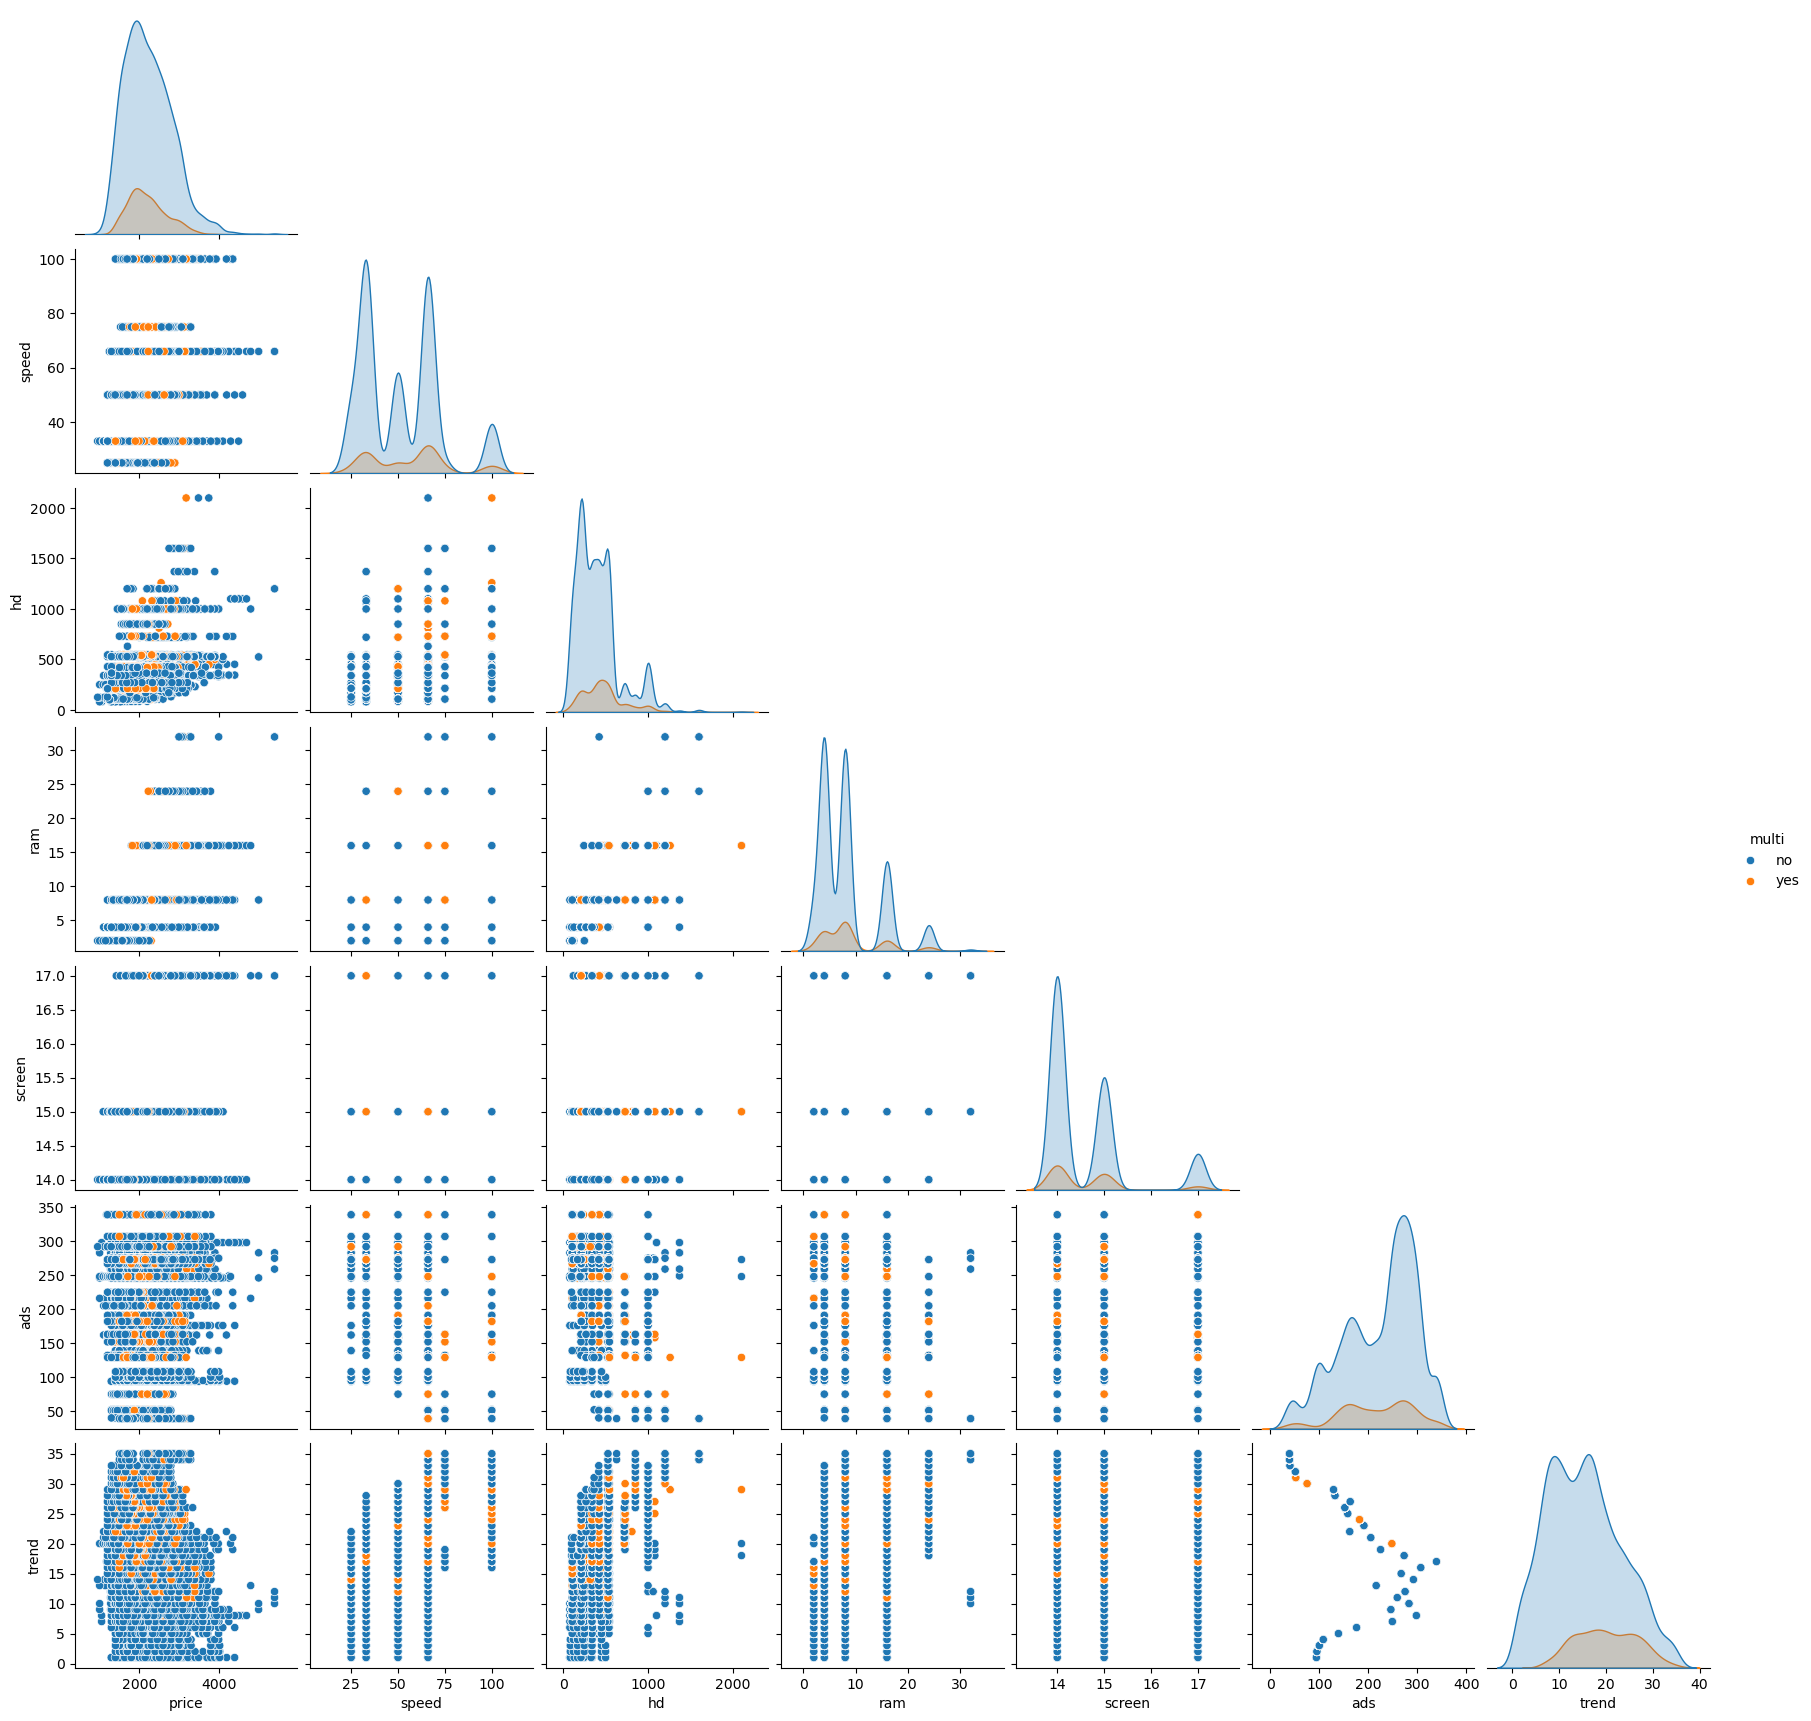

In [10]:
# Creating a pairplot to visualize pairwise relationships between numerical features
# 'corner=True' hides the upper triangle for a cleaner look
sns.pairplot(computers, hue= "multi", corner=True)

In [23]:
# Calculating the correlation matrix for all numerical features in the 'computers' DataFrame
# 'numeric_only=True' ensures only numeric columns are included
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


### Feature Correlation with price:
- ram      : 0.6227  -> Strongest positive correlation — likely very important for prediction.
- hd       : 0.4303  -> Moderately positive — can help the model.
- speed    : 0.3010  -> Mild positive correlation — useful.
- screen   : 0.2960  -> Also mildly positive — could include.
- ads      : 0.0545  -> Very weak — may not add much predictive power.
- trend    : -0.2000 -> Slight negative correlation — might be worth investigating.
ing.

- From the above it is clear that ram has a high correlation to price
- Hence, ram will be our features variable

### Model Fitting

In [24]:
# Importing the statsmodels library for statistical modeling
import statsmodels.api as sm

# Adding a constant (intercept) to the features (X) for the regression model
# This allows the model to include an intercept term
X = sm.add_constant(computers["ram"])

# Defining the target variable (y) as the 'price' column from the DataFrame
y = computers["price"]

# Fitting an Ordinary Least Squares (OLS) regression model
# 'model' contains the results of the regression analysis
model = sm.OLS(y, X).fit()

# Displaying the summary of the regression model to understand coefficients, p-values, R-squared, etc.
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:38:20   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Intepretation:


### OLS Regression Results Interpretation

- **Dependent Variable**: `price`  
  The model is predicting the price of computers based on the `'ram'` feature.

- **R-squared**: `0.388`  
  The model explains about 38.8% of the variance in the price. This suggests that the model has a moderate explanatory power, but there is still room for improvement (e.g., adding more features or using a different model).

- **Adjusted R-squared**: `0.388`  
  This value is the adjusted R-squared, which accounts for the number of predictors in the model. Since it's very close to the regular R-squared, it suggests that adding more features might not drastically improve the model's fit.

- **F-statistic**: `3964.0`  
  The F-statistic tests the overall significance of the regression model. A high value (and a very low p-value) indicates that at least one of the predictors is significantly related to the dependent variable (in this case, 'ram').

- **Prob (F-statistic)**: `0.00`  
  This is the p-value for the F-statistic. Since it's very low (less than 0.05), it confirms that the model as a whole is statistically significant.

- **Coefficients**:
  - **const**: `1687.2925`  
    The intercept term is 1687.29. This means that if `'ram'` were 0 (hypothetically, since this might not be realistic), the price of the computer would be approximately 1687.29.
  - **ram**: `64.2316`  
    The coefficient for `'ram'` is 64.23, meaning for each additional unit increase in `'ram'`, the price of the computer increases by 64.23, holding all else constant. This suggests a strong positive relationship between `'ram'` and `'price'`.

- **p-values**:
  - Both the intercept and `'ram'` have p-values of `0.000`, which is far below the typical significance level of 0.05. This indicates that both the intercept and `'ram'` are statistically significant predictors of the price.

- **Omnibus**: `1327.783`  
  **Durbin-Watson**: `1.533`  
  These are test statistics for checking assumptions of normality of residuals and autocorrelation, respectively. A value of `1.533` suggests some autocorrelation, which could indicate model misspecification or that there’s structure left in the residuals.

- **Jarque-Bera (JB)**: `3113.140`  
  The p-value for this test is `0.00`, indicating that the residuals are not normally distributed (which violates one of the OLS assumptions).

- **Skew**: `1.188`  
  The residuals are positively skewed, suggesting that the distribution of errors is not symmetric.

- **Kurtosis**: `5.508`  
  The kurtosis value is high (greater than 3), which indicates that the residuals have heavy tails. This means there are more extreme outliers than in a normal distribution.

- **Condition Number**: `17.9`  
  This value indicates that there is no multicollinearity problem, as it's not excessively large (above 30 could be a concern).

---

### Conclusion:
- The model is statistically significant, with a solid relationship between `'ram'` and `'price'`.
- However, there are issues with normality and autocorrelation in the residuals, suggesting the model could be improved, possibly by adding more features or trying different regression techniques.


### Plot Residuals

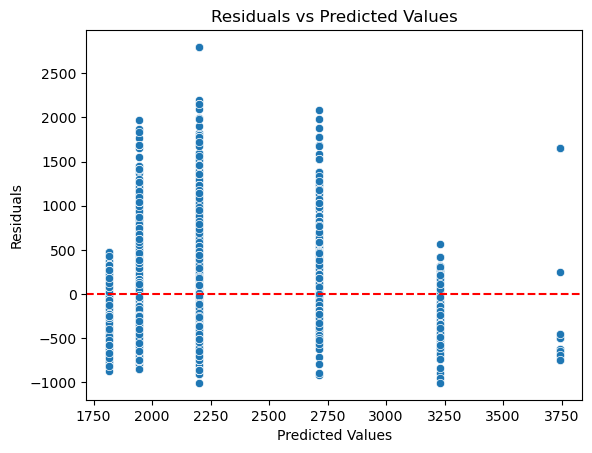

In [27]:
# Creating a scatter plot of the predicted values versus the residuals
# This helps to check for any patterns in the residuals (important for regression assumptions)
sns.scatterplot(x = model.predict(), y = model.resid)

# Adding a horizontal line at y=0 to represent no residual error
plt.axhline(0, color='red', linestyle='--')

# Adding titles and labels for better understanding of the plot
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Display the plot
plt.show()


<!-- 
This plot shows the residuals versus predicted values for a regression model. 
- Each point represents a residual (actual - predicted) plotted against its corresponding predicted value. 
- The red dashed line at y = 0 helps visualize how residuals are distributed around zero.
- The vertical clustering of points suggests that the predicted values take on only a few distinct levels, possibly due to categorical predictors or model limitations.
- The spread of residuals appears to increase with predicted values, indicating potential heteroscedasticity (non-constant variance of residuals).
- Ideally, residuals should be randomly scattered around the zero line with no clear pattern to satisfy regression assumptions.
-->



This plot shows the residuals versus predicted values for a regression model. 
- Each point represents a residual (actual - predicted) plotted against its corresponding predicted value. 
- The red dashed line at y = 0 helps visualize how residuals are distributed around zero.
- The vertical clustering of points suggests that the predicted values take on only a few distinct levels, possibly due to categorical predictors or model limitations.
- The spread of residuals appears to increase with predicted values, indicating potential heteroscedasticity (non-constant variance of residuals).
- Ideally, residuals should be randomly scattered around the zero line with no clear pattern to satisfy regression assumpts.
-->


In [29]:
# Creating a new DataFrame 'residuals' to store actual vs predicted values along with residuals
# The columns will include 'ram', 'price', 'Predicted price', and 'residual' (difference between actual and predicted)
residuals = pd.DataFrame(
    {
        "ram": computers["ram"],  # Storing the 'ram' feature for reference
        "price": computers["price"],  # Storing the actual 'price'
        "Predicted price": model.predict(),  # Storing the predicted prices from the OLS model
        "residual": model.resid  # Storing the residuals (difference between actual and predicted prices)
    }
)

# Displaying the first 5 rows of the 'residuals' DataFrame to get an overview
residuals.head()


,ram,price,Predicted price,residual
0,4,1499,1944.219043,-445.219043
1,2,1795,1815.755790,-20.755790
2,4,1595,1944.219043,-349.219043
3,8,1849,2201.145550,-352.145550
4,16,3295,2714.998564,580.001436


### Summary of Actual vs Predicted Prices and Residuals for Different RAM Values

| **ram** | **price** | **Predicted price** | **residual**   |
|---------|-----------|---------------------|----------------|
| 4       | 1499      | 1944.22             | -445.22        |
| 2       | 1795      | 1815.76             | -20.76         |
| 4       | 1595      | 1944.22             | -349.22        |
| 8       | 1849      | 2201.15             | -352.15        |
| 16      | 3295      | 2715.00             | 580.00         |

### Column Explanations:
- **ram**: The amount of RAM (in GB).
- **price**: The actual price of the computer with the given RAM.
- **Predicted price**: The price predicted by the model based on the 'ram' feature.
- **residual**: The difference between the actual price and the predicted price (`price - Predicted price`).

### Key Insights:
- The **residuals** represent the errors between the predicted and actual prices.
- **Negative residuals** indicate that the predicted price was **higher** than the actual price (e.g., for 4 GB and 8 GB RAM).
- **Positive residuals** (e.g., for 16 GB RAM) indicate that the predicted price was **lower** than the actual price.
- For RAM sizes like **4 GB and 8 GB**, the model tends to **over-predict**, while for **16 GB**, it under-predicts the price.
- The **residuals** provide insight into the model's prediction accuracy, with higher values indicating larger discrepancies.

This table and its analysis can help assess how well the model performs and where it may need improvement.


### Make Predictions with the values below

In [31]:
# Defining a list of feature values (different amounts of RAM) for which we want to predict the price
feature_values = [0, 2, 4, 8, 16, 32, 64]

# Creating a new DataFrame 'X_predict' for the feature 'ram', including a constant term (intercept)
# This will be used to predict the price for different amounts of RAM
X_predict = sm.add_constant(pd.DataFrame({ "ram" : feature_values }))

# Displaying the 'X_predict' DataFrame to ensure it has the correct format for prediction
X_predict


,const,ram
0,1.0,0
1,1.0,2
2,1.0,4
3,1.0,8
4,1.0,16
5,1.0,32
6,1.0,64


In [45]:
# Making predictions using the trained OLS model for the new feature values of 'ram'
predictions = model.predict(X_predict)

# Naming the series to make it more readable (renaming it to 'price predictions')
predictions.name = "price predictions"

# Setting the index of the predictions to match the original feature values for 'ram'
# This allows you to easily relate each prediction to its corresponding RAM value
predictions.index = feature_values

# Displaying the predictions
print(predictions)


0     1687.292537
2     1815.755790
4     1944.219043
8     2201.145550
16    2714.998564
32    3742.704591
64    5798.116644
Name: price predictions, dtype: float64


In [35]:
# Querying the 'computers' DataFrame to filter rows where 'ram' is in the specified feature values
# This allows us to focus on the specific RAM values we used for predictions
(computers
    .query("ram in @feature_values")  # Filter data for the selected 'ram' values
    .groupby("ram")  # Grouping the data by 'ram' (i.e., each unique value of RAM)
    .agg({"price": "mean"})  # Aggregating by taking the mean of 'price' for each group (RAM value)
    .reset_index()  # Resetting the index to make 'ram' a column again after groupby
    .merge(predictions, left_index=True, right_index=True)  # Merging the mean prices with the predictions on 'ram' values
    .assign(
        # Adding a new column 'error' (difference between actual price and predicted price)
        error=lambda x: x["price"] - x["price predictions"], 
        
        # Adding a new column 'percentage_error' (calculation of percentage error)
        percentage_error=lambda x: (x["error"] / x["price"]) * 100
    )
)


,ram,price,price predictions,error,percentage_error
0,2,1703.253807,1687.292537,15.961270,0.937105
2,8,2298.154741,1815.755790,482.398951,20.990708
4,32,3612.062500,1944.219043,1667.843457,46.174269


### Summary of Actual vs Predicted Prices for Different RAM Values

| **ram** | **price** | **price predictions** | **error** | **percentage_error** |
|---------|-----------|-----------------------|-----------|----------------------|
| 2       | 1703.25   | 1687.29               | 15.96     | 0.94%                |
| 8       | 2298.15   | 1815.76               | 482.40    | 20.99%               |
| 32      | 3612.06   | 1944.22               | 1667.84   | 46.17%               |

- **ram**: Amount of RAM (in GB).
- **price**: The actual mean price for computers with the given amount of RAM.
- **price predictions**: The predicted price for the given RAM based on the regression model.
- **error**: The difference between the actual price and the predicted price.
- **percentage_error**: The error as a percentage of the actual price, indicating how accurate the prediction is.

### Key Insights:
- As the RAM size increases, the error and percentage error also increase.
- The predicted prices tend to under-estimate the actual prices, especially for higher RAM values (e.g., 32 GB RAM).
- The percentage error for 32 GB of RAM is significantly high (46.17%), which may suggest the model needs improvement for higher values of RAM.
